# RNN and CURBD analysis - trial averaged data
### Mouse: M061
### Session: 2025_03_04_10_00 & 2025_03_05_14_00

#### Imports

In [1]:
# imports
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
import sys
import os

# Add the project root to sys.path
import sys
sys.path.append('/data/PyalData')

import pyaldata as pyal
import pylab
from collections import Counter
import importlib

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# for RNN and CURBD
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from tools.curbd import curbd
from tools.dsp.preprocessing import preprocess
from tools.rnn_and_curbd import rnn as rnnz
from tools.rnn_and_curbd import plotting as pltz
from tools.rnn_and_curbd import model_analysis as analyz
from tools.rnn_and_curbd import curbd as curbdz

importlib.reload(rnnz)
importlib.reload(pltz)
importlib.reload(analyz)
importlib.reload(curbdz)

np.random.seed(44)

# 4th March 10:00 session

In [ ]:
# Files 
data_dir = "/data/bnd-data/raw/M061/M061_2025_03_04_10_00"
fname0 = os.path.join(data_dir, "M061_2025_03_04_10_00_pyaldata_0.mat")
fname1 = os.path.join(data_dir, "M061_2025_03_04_10_00_pyaldata_1.mat")
fname2 = os.path.join(data_dir, "M061_2025_03_04_10_00_pyaldata_2.mat")

# Load files
df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
df2 = pyal.mat2dataframe(fname2, shift_idx_fields=True)
df = pd.concat([df0, df1, df2], ignore_index=True)
df = df.drop(columns="all_spikes") # the content is incorrect

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
field idx_motion could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to 

### Preprocess

In [14]:
for region in ["MOp", "SSp", "CP", "VAL"]:
    print(f"Neurons in {region}: {df[f'{region}_spikes'][0].shape[1]}")

Neurons in MOp: 309
Neurons in SSp: 92
Neurons in CP: 490
Neurons in VAL: 268


In [25]:
df_ = preprocess(df, only_trials=True)

# bin size
BIN_SIZE = df_['bin_size'][0]

# get 'all_rates' column
areas =[ "MOp_rates", "SSp_rates", "CP_rates", "VAL_rates"]
df_ = pyal.merge_signals(df_, areas, "all_rates")

# correct trial length - this is an error in pyaldata
df_['trial_length'] = (df_['trial_length'] / (BIN_SIZE * 100)).astype(int)
df_ = df_[df_['trial_length'] == 200]

/data/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/data/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/data/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/data/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.8529411764706% of trials
  warnings.warn(
/data/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/data/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.war

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (240, 200)
Resulting SSp_spikes ephys data shape is (NxT): (59, 200)
Resulting CP_spikes ephys data shape is (NxT): (225, 200)
Resulting MOp_spikes ephys data shape is (NxT): (206, 200)
Resulting GPe_spikes ephys data shape is (NxT): (112, 200)


In [26]:
df_.head()

animal                session  trial_id trial_name  trial_length  bin_size  \
0   M061  M061_2025_03_04_10_00         2      trial           200      0.03   
1   M061  M061_2025_03_04_10_00         4      trial           200      0.03   
2   M061  M061_2025_03_04_10_00         6      trial           200      0.03   
3   M061  M061_2025_03_04_10_00         8      trial           200      0.03   
4   M061  M061_2025_03_04_10_00        10      trial           200      0.03   

   idx_trial_start  idx_trial_end idx_CPI values_before_camera_trigger  ...  \
0            20033          20232      []                           []  ...   
1            20399          20599      []                           []  ...   
2            20766          20966      []                           []  ...   
3            20999          21199      []                           []  ...   
4            21233          21432      []                           []  ...   

                                         GPe_KSLabel  \
0  [mua, good, good, good, good, good, good, good...   
1  [mua, good, good, good, good, good, good, good...   
2  [mua, good, good, good, good, good, good, good...   
3  [mua, good, good, good, good, good, good, good...   
4  [mua, good, good, good, good, good, good, good...   

                                          GPe_spikes  \
0  [[1.4142135623730951, 1.7320508075688772, 0.0,...   
1  [[1.4142135623730951, 1.4142135623730951, 0.0,...   
2  [[2.0, 1.0, 0.0, 1.4142135623730951, 0.0, 1.41...   
3  [[1.0, 1.4142135623730951, 1.0, 1.0, 1.4142135...   
4  [[1.0, 1.0, 1.7320508075688772, 1.414213562373...   

                                           VAL_rates  \
0  [[0.0, 13.233258326848349, 0.0, 0.0, 0.2123920...   
1  [[0.0, 33.15646052360535, 0.0, 0.0, 10.2181196...   
2  [[0.0, 23.080575466156006, 0.9488953898350398,...   
3  [[0.0, 27.377114693323772, 9.004130959510803, ...   
4  [[0.0, 24.921296040217083, 0.2123920402179162,...   

                                           SSp_rates  \
0  [[0.03477109130471945, 0.0, 12.984247008959453...   
1  [[0.0, 0.0, 9.000157316525778, 0.0, 0.00397311...   
2  [[0.0, 0.0, 13.912774125734966, 0.0, 24.081718...   
3  [[0.0, 3.9580638209978742, 35.435382525126144,...   
4  [[0.0, 0.0, 14.2153799533844, 10.2220932642618...   

                                            CP_rates  \
0  [[0.0, 0.0, 0.0, 0.9141243373354276, 14.111214...   
1  [[0.9141243373354276, 0.03477109130471945, 12....   
2  [[0.0, 0.0, 0.0003196751701276905, 0.0, 16.419...   
3  [[10.252890984217327, 0.0, 0.0, 0.0, 7.1155081...   
4  [[0.0, 0.0, 0.00397311378037557, 0.0, 6.201383...   

                                           MOp_rates  \
0  [[0.0, 2.7987738450368247, 0.0, 0.305986528595...   
1  [[12.95344928900401, 0.0, 0.0, 0.0, 0.0, 16.66...   
2  [[12.95344928900401, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [[14.450603723526001, 0.0, 0.0, 0.247163139283...   
4  [[23.167596260706585, 0.0, 0.0, 29.65795993804...   

                                           GPe_rates sol_level_id  \
0  [[41.64616664250692, 51.76765124003093, 34.364...            1   
1  [[42.72517760594686, 40.02285401026408, 0.0, 4...            1   
2  [[50.90857346852621, 32.538360357284546, 2.798...            0   
3  [[38.798888524373375, 36.83230479558309, 29.35...            1   
4  [[39.390273888905845, 34.98758474985759, 28.70...            0   

  sol_contra_ipsi                                          all_rates  
0               0  [[0.0, 2.7987738450368247, 0.0, 0.305986528595...  
1               1  [[12.95344928900401, 0.0, 0.0, 0.0, 0.0, 16.66...  
2               0  [[12.95344928900401, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3               1  [[14.450603723526001, 0.0, 0.0, 0.247163139283...  
4               0  [[23.167596260706585, 0.0, 0.0, 29.65795993804...  

[5 rows x 54 columns]

### Some parameters

In [45]:
# Get mouse number
mouse = "M061_2025_03_04_10_00_pyaldata_0.mat".split('_')[0]

# perturbation time
perturbation_time = df_.idx_sol_on[0]
perturbation_time_sec = df_.idx_sol_on[0] * BIN_SIZE

# solenoid angles
sol_angles: list = df_.values_Sol_direction.unique()
sol_angles.sort()

# number of trials
num_trials = len(df_)
print(f"Number of trials: {num_trials}")

# Set interpolation factor for RNN 
dtFactor = 2

Number of trials: 338


### Concatenate trials only

In [28]:
# getting trial avg data
trial_avg_rates = rnnz.average_by_trial(df_, sol_angles)
shapes = [arr.shape[0] for arr in trial_avg_rates]

# concatenate data
concat_rates = np.concatenate(trial_avg_rates, axis=0)

print("Averaged activity shape:", trial_avg_rates.shape)
print("Concatenated average activity shape:", concat_rates.shape)

# set up for RNN
trial_avg_activity = np.transpose(concat_rates)
reset_points = rnnz.get_reset_points(df_, trial_avg_activity, areas, dtFactor)
regions_arr = rnnz.get_regions(df_, areas)

print(f"Building {len(regions_arr)} region RNN network")
print(f"Regions: {[region[0] for region in regions_arr]}\n")

Averaged activity shape: (12, 200, 730)
Concatenated average activity shape: (2400, 730)
Trial length: 200
Building 4 region RNN network
Regions: ['MOp', 'SSp', 'CP', 'VAL']



### Plot RNN input

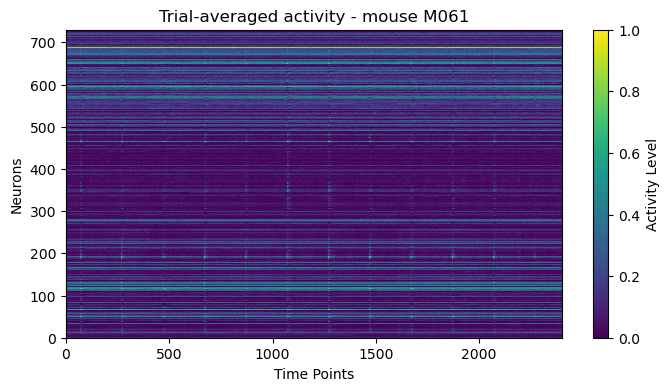

In [29]:
pltz.plot_neuron_activity(rnnz.rescale_array(trial_avg_activity.T), "Trial-averaged activity", mouse)

## RNN training

In [31]:
# RNN hyperparameters
nRunTrain = 5

reset points length: 338
last reset at: 134800
RNN input shape: (730, 2400)
trial=0 pVar=0.951365 chi2=1.918867
trial=1 pVar=0.961689 chi2=1.550037
trial=2 pVar=0.963101 chi2=1.495621
trial=3 pVar=0.963606 chi2=1.473290
trial=4 pVar=0.964070 chi2=1.452118
trial=5 pVar=0.957411 chi2=1.742938


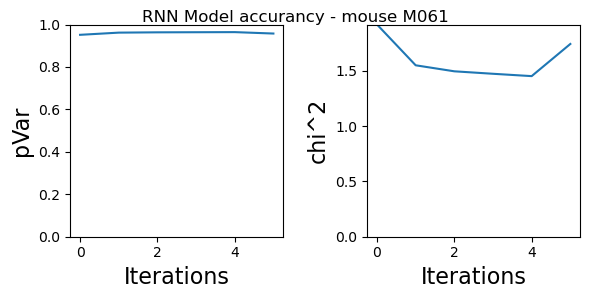

In [32]:
rnn_model, rnn_accuracy_fig = rnnz.run_rnn(trial_avg_activity, reset_points, regions_arr, df_, mouse, dtFactor = dtFactor, nRunTrain = nRunTrain)

### Plot RNN output

In [33]:
rnn_model_ = rnn_model.copy()
rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)

RNN model output transformed from shape: (730, 4799) to (730, 2400). Matching the original data shape of (730, 2400)


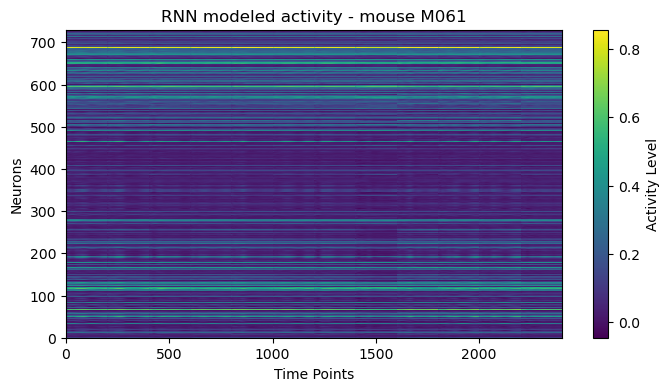

In [34]:
pltz.plot_neuron_activity(rnn_model_['RNN'].T, "RNN modeled activity", mouse)

## Analysis of model fit

### PCA whole model

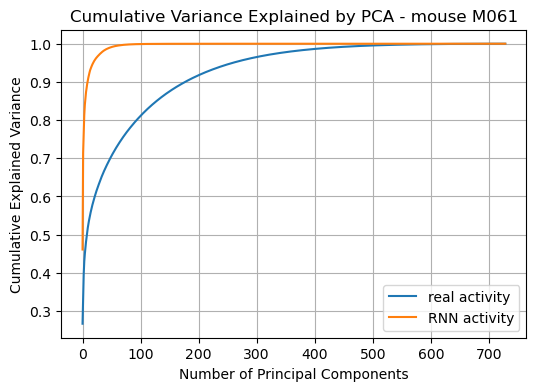

In [35]:
rnn_activity = rnn_model_['RNN'].T
real_activity = rnn_model_['Adata'].T
num_components = rnn_activity.shape[1] - 1

pca_real, pca_data_real = analyz.pca_fit_transform(real_activity, num_components)
pca_rnn, pca_data_rnn = analyz.pca_fit_transform(rnn_activity, num_components)

variance_figure = pltz.plot_pca_cum_var(pca_real, pca_rnn, mouse)

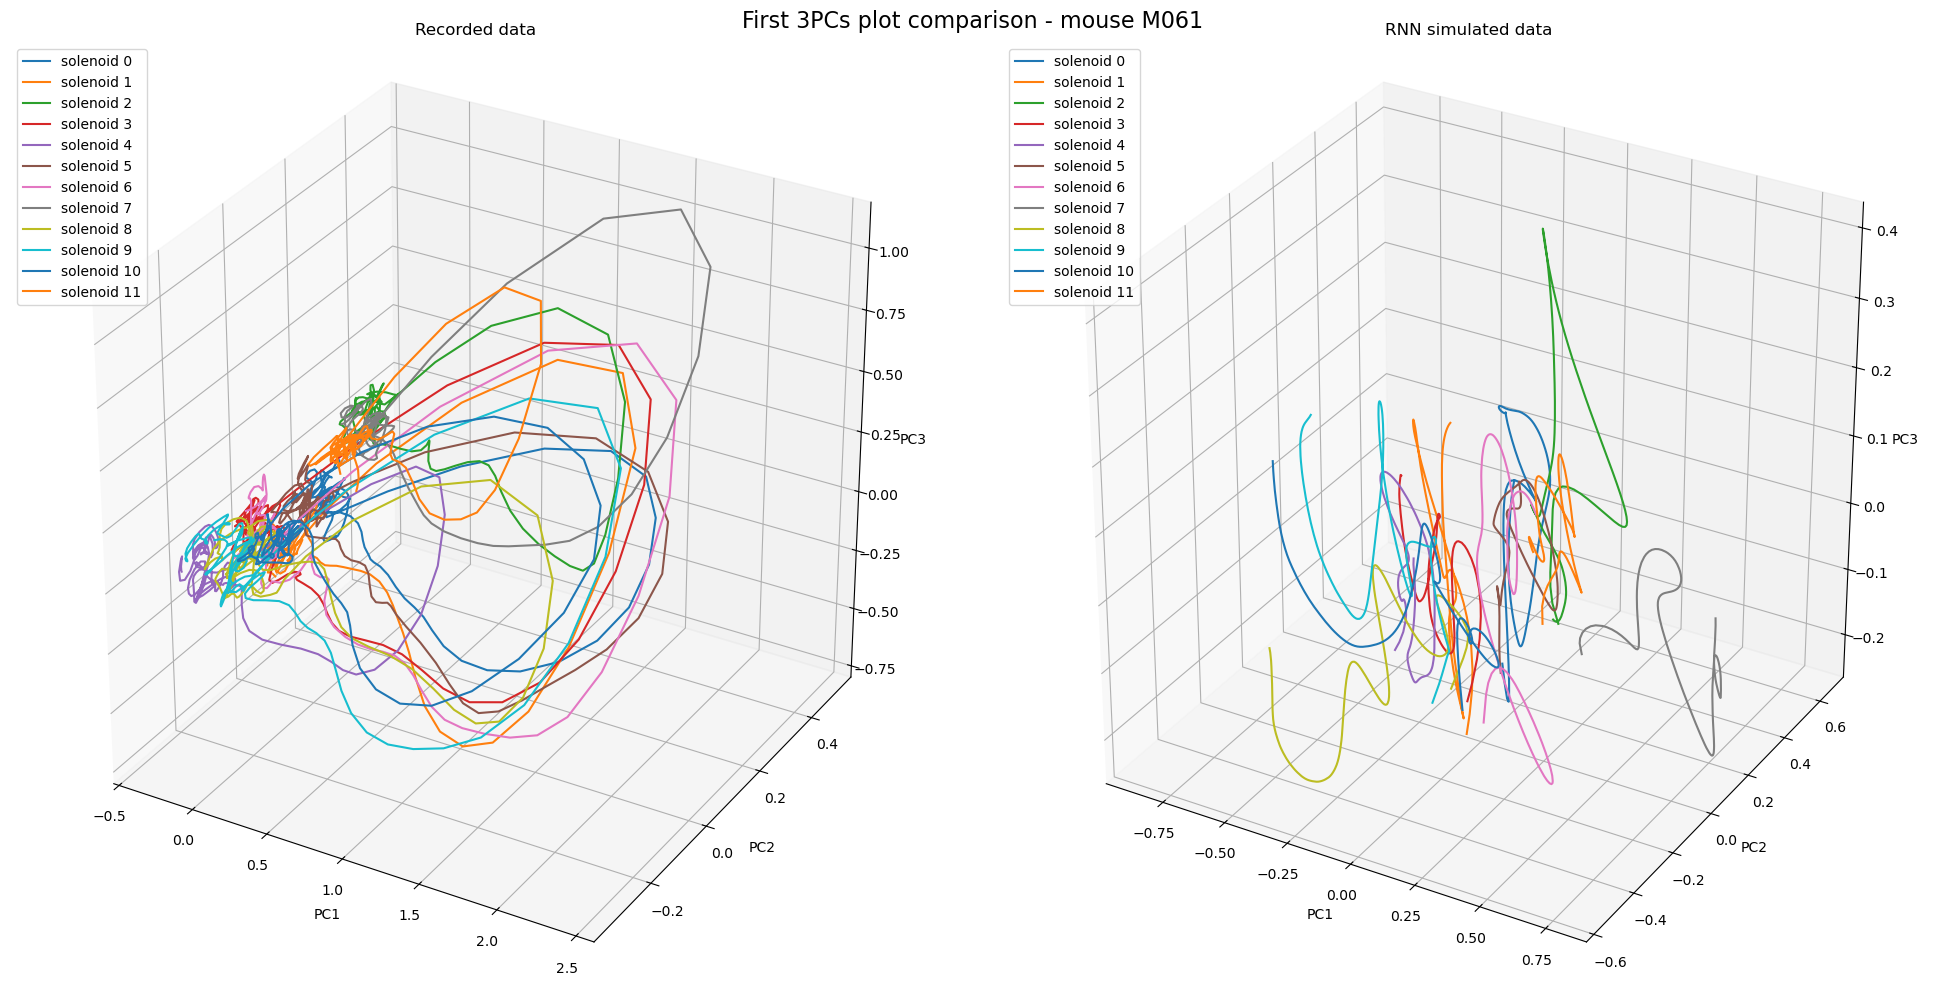

In [37]:
trial_labels = [f"solenoid {angle}" for angle in sol_angles]
PCA_figure = pltz.plot_pca(pca_data_real, pca_data_rnn, shapes, mouse, trial_labels) 

### CCA

In [38]:
model_cca = analyz.canoncorr(pca_data_real, pca_data_rnn)
ctrl1_cca = analyz.canoncorr(pca_data_real, pca_data_real)
ctrl2_cca = analyz.canoncorr(pca_data_rnn, pca_data_rnn)

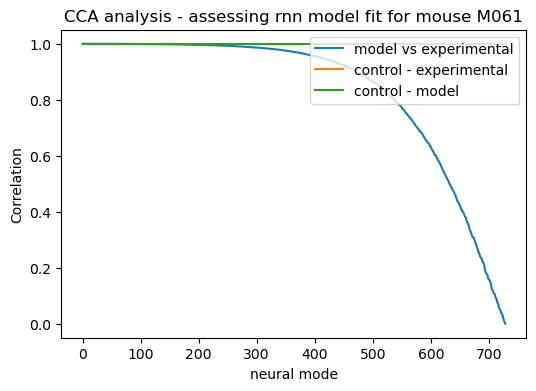

In [39]:
cca_figure = pltz.plot_cca(model_cca, ctrl1_cca, ctrl2_cca, mouse)

### PCA by brain region

In [40]:
PCA_data_real, pcas_real = analyz.pca_by_region(real_activity, regions_arr)
PCA_data_rnn, pcas_rnn = analyz.pca_by_region(rnn_activity, regions_arr)

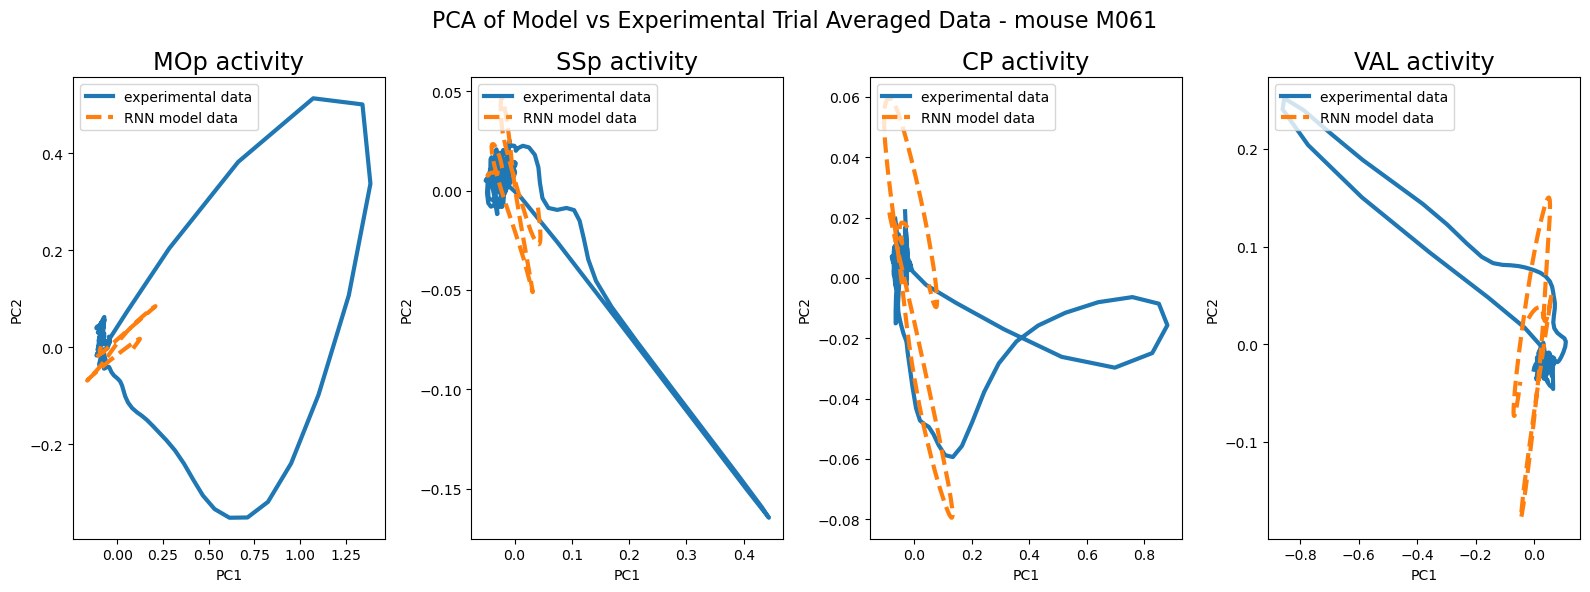

In [41]:
figure = pltz.plot_pca_by_region(PCA_data_real, PCA_data_rnn, shapes, regions_arr, mouse)

### Weight matrix

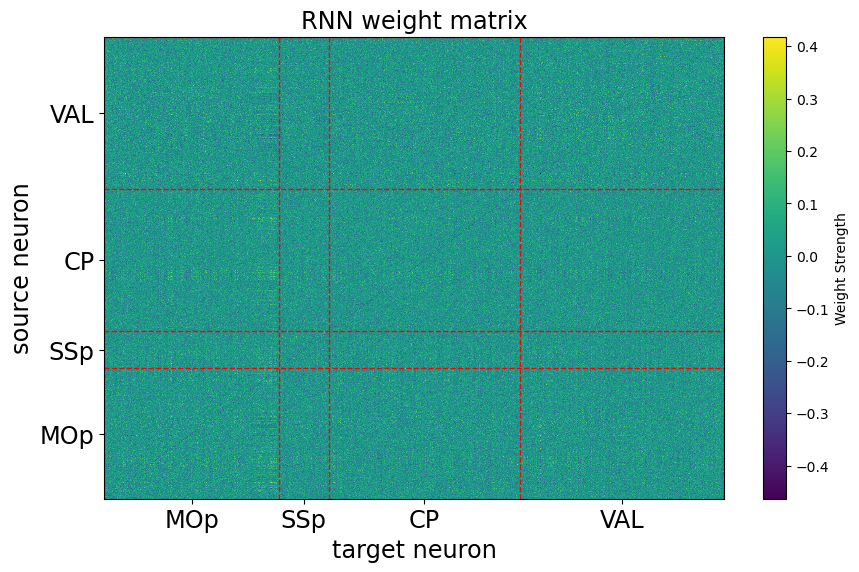

In [42]:
weight_matrix_fig = pltz.plot_rnn_weight_matrix(rnn_model, regions_arr)

### Firing rate analysis

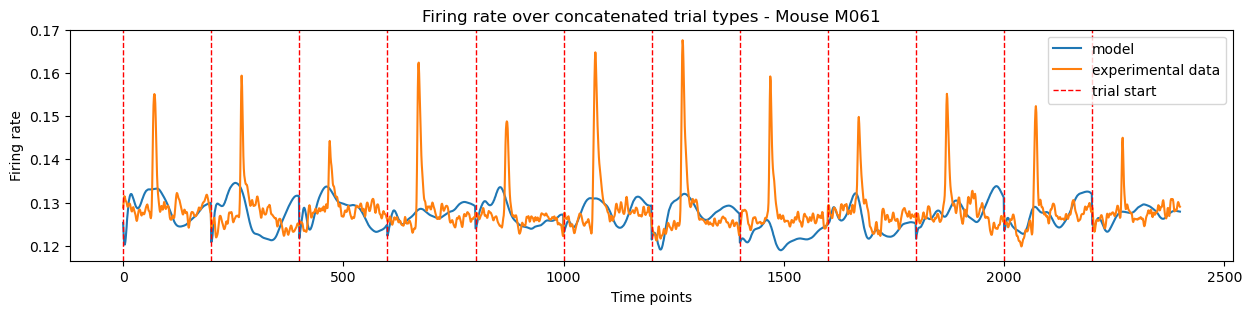

In [43]:
fr_fig = pltz.plot_firing_rates(rnn_model_, reset_points, mouse)

/home/zms24/Desktop/earthquake-analysis/tools/rnn_and_curbd/plotting.py:275: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


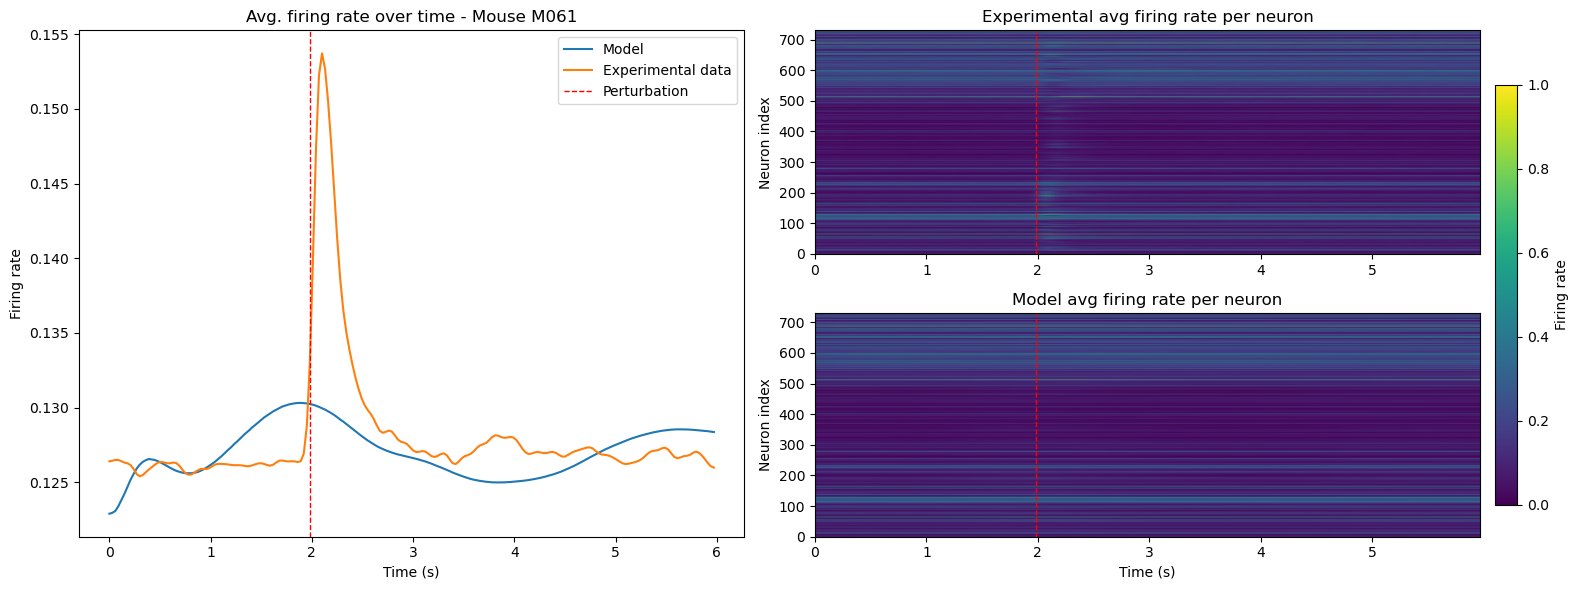

In [46]:
avg_fr_fig = pltz.plot_avg_firing_rates(rnn_model_, shapes, perturbation_time_sec, bin_size=BIN_SIZE, mouse_num=mouse)

## CURBD

In [47]:
curbd_arr, curbd_labels = curbd.computeCURBD(rnn_model)
n_regions = curbd_arr.shape[0]

In [48]:
currents, current_labels = curbdz.format_curbd_output(curbd_arr, curbd_labels, n_regions, reset_points)

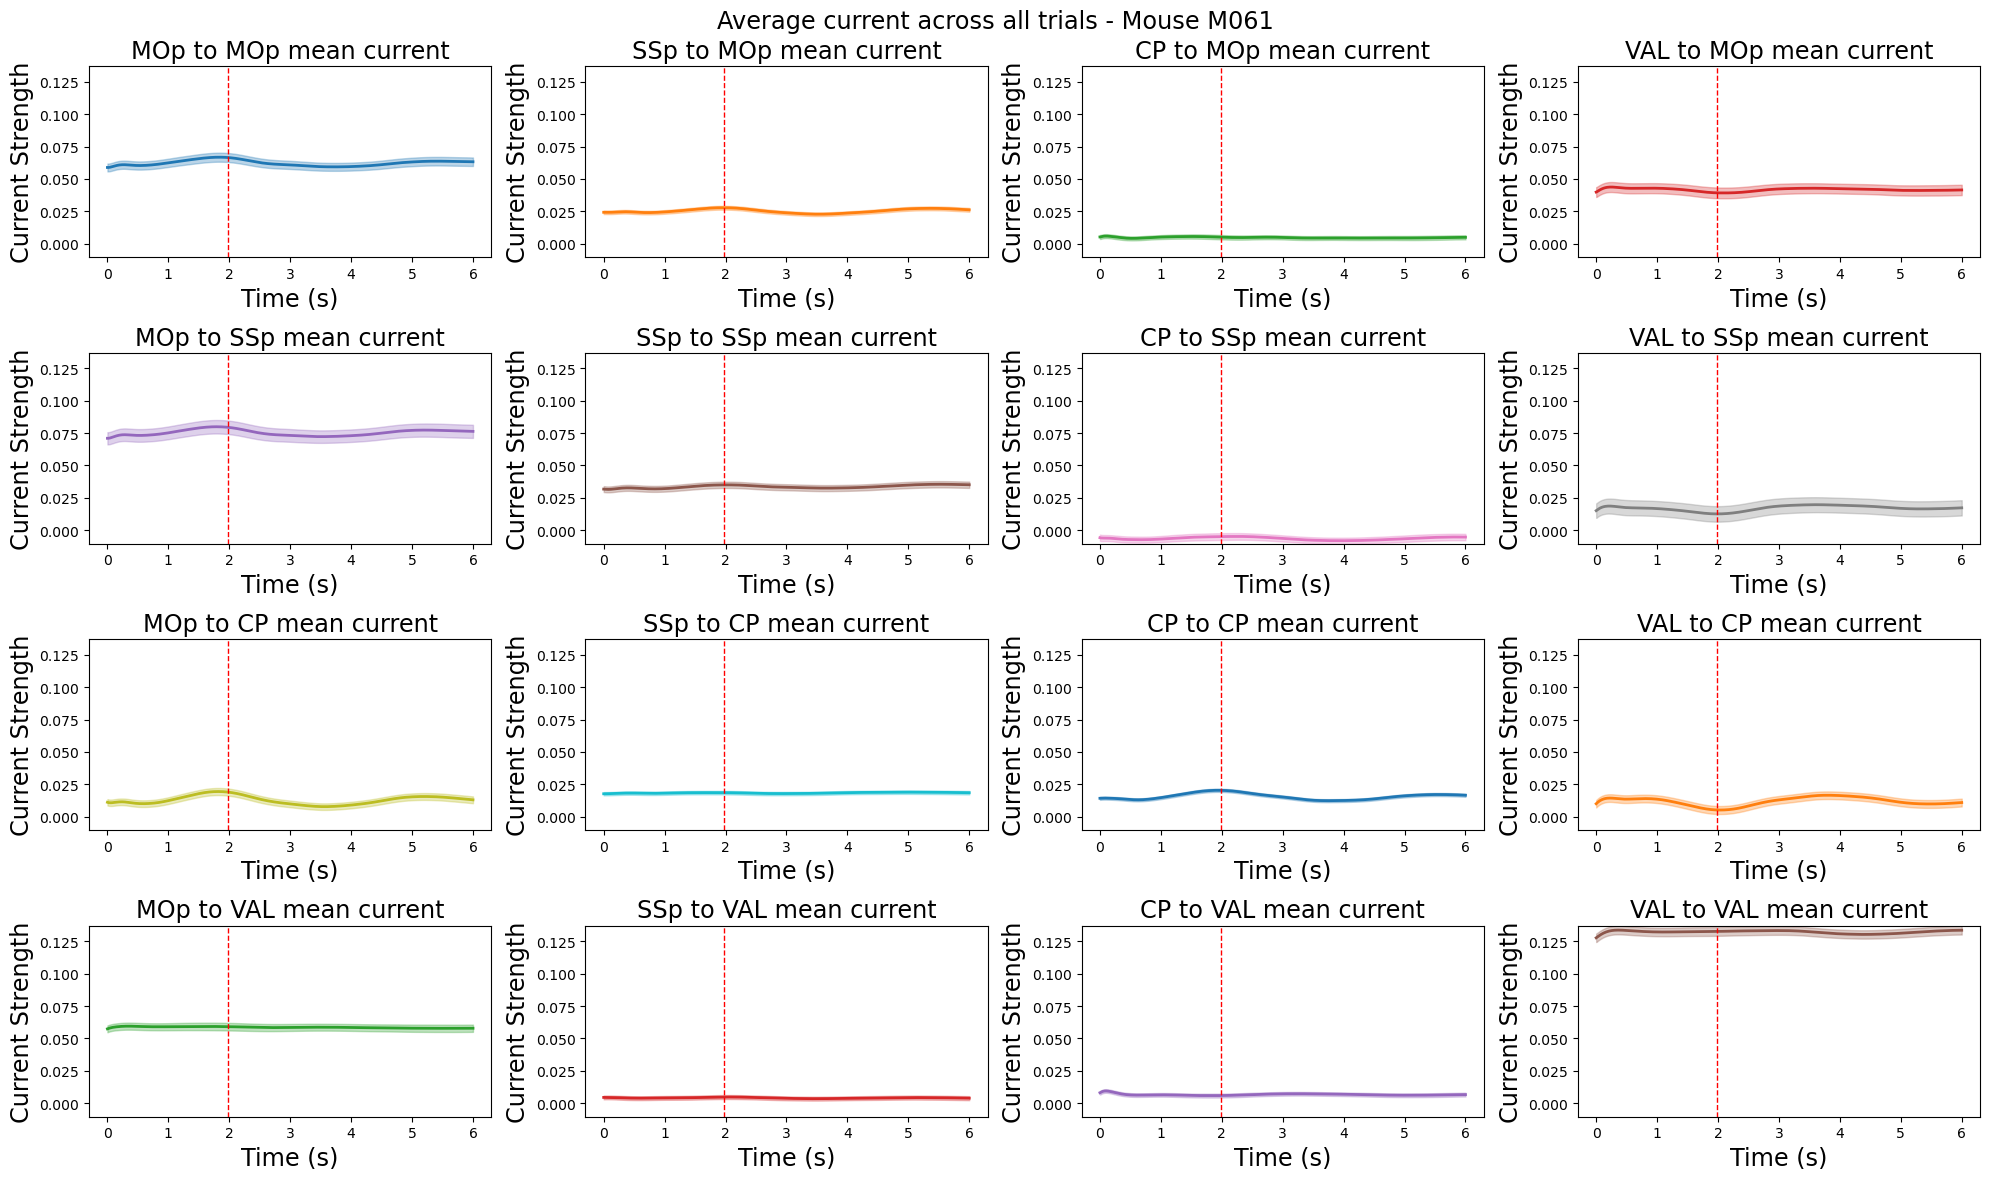

In [49]:
currents_fig = pltz.plot_currents_by_region(currents, current_labels, perturbation_time_sec, BIN_SIZE, dtFactor, mouse)

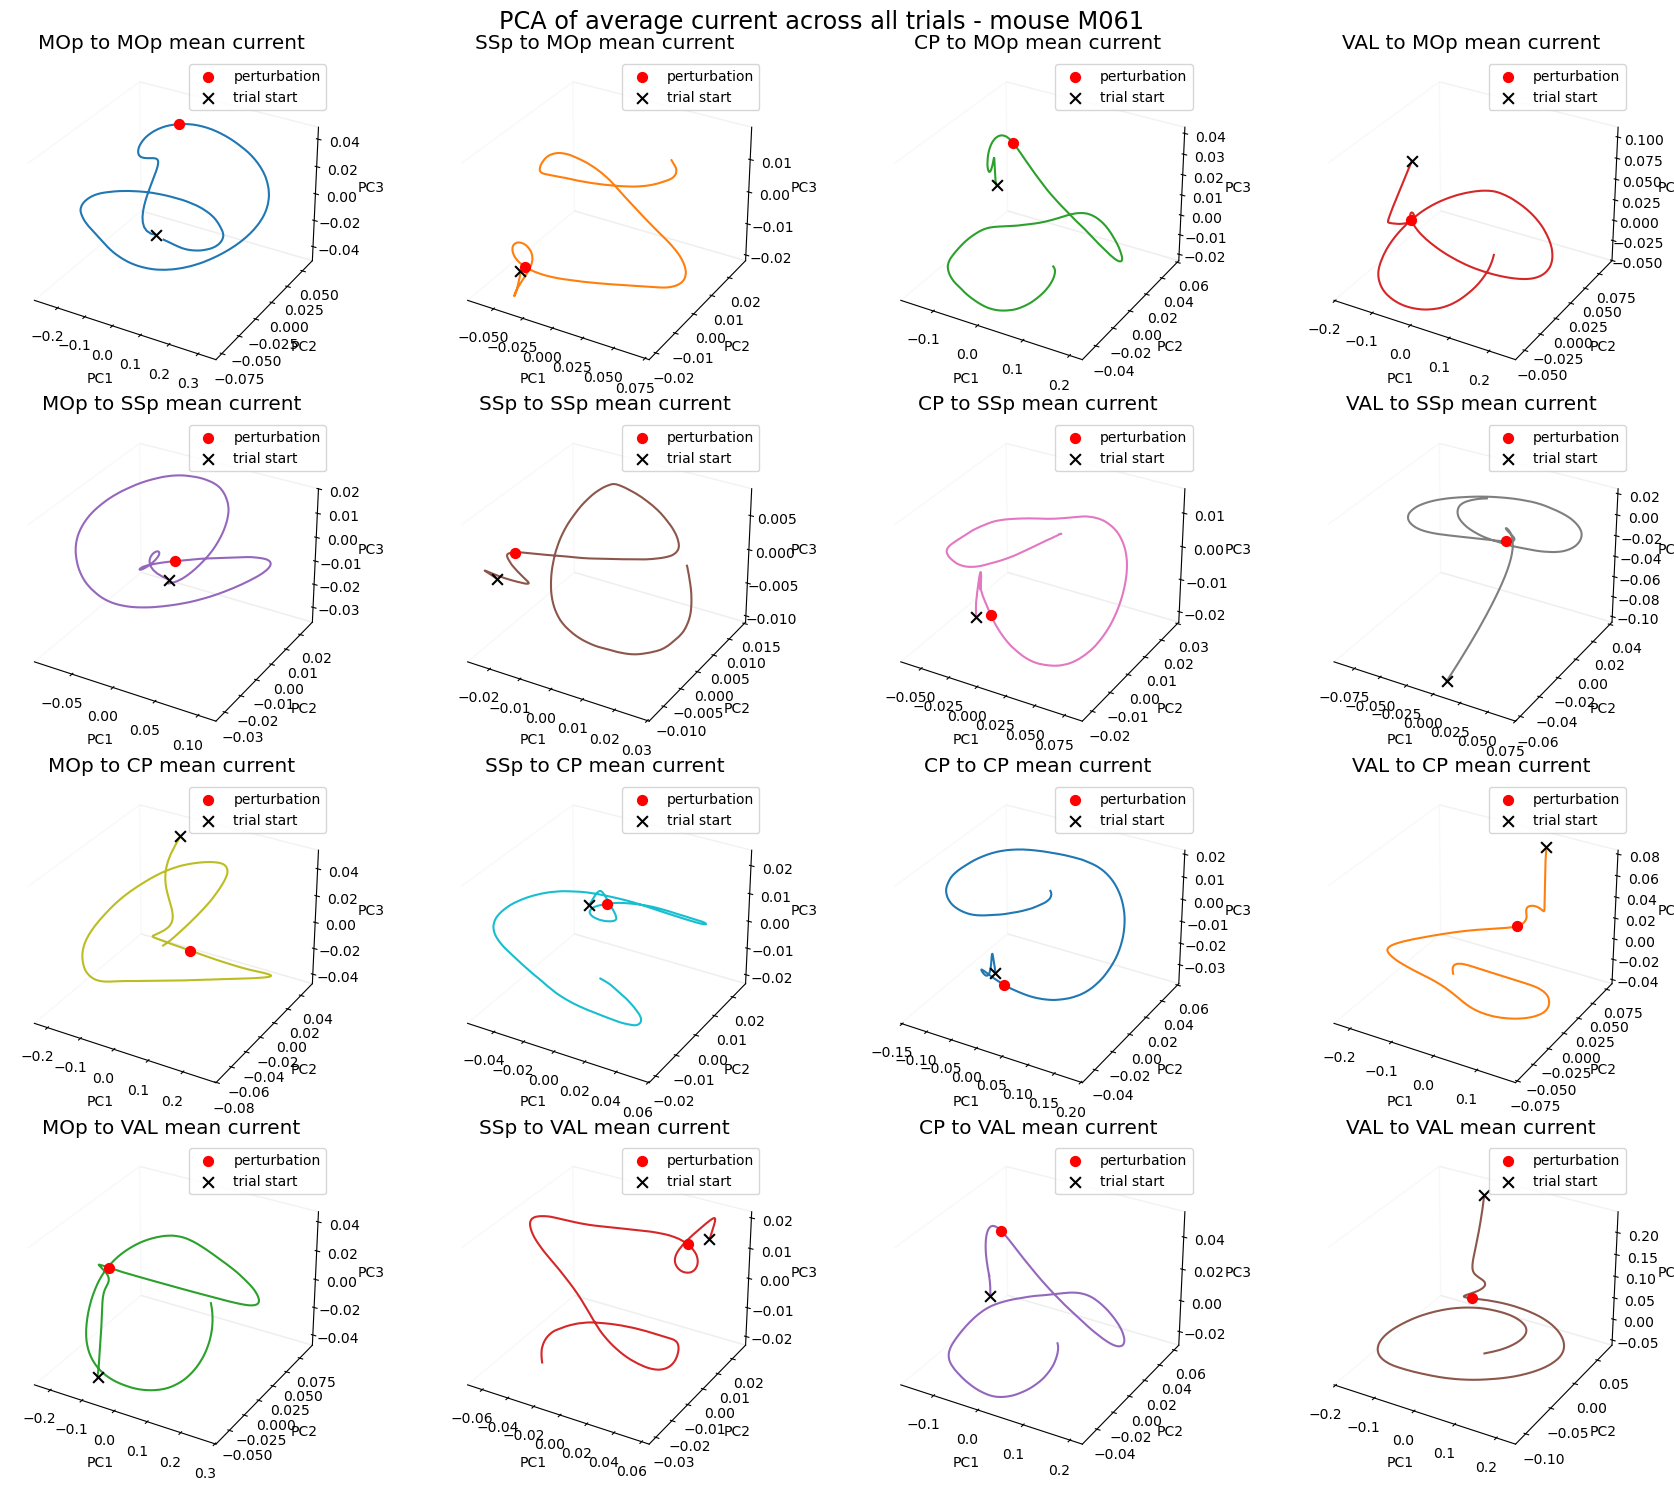

In [50]:
pca_current_fig = pltz.plot_pca_currents(currents, current_labels, perturbation_time, mouse, fig_size = (18, 15))

### Saving RNN model

In [ ]:
rnn_model_to_save = rnn_model.copy()
try:
    if isinstance(rnn_model_to_save['params'].get('nonLinearity'), np.ufunc):
        rnn_model_to_save['params']['nonLinearity'] = rnn_model_to_save['params']['nonLinearity'].__name__
    savemat(f"rnn_model_{mouse}.mat", {"rnn_model": rnn_model_to_save})
except Exception as e:
    print(f"Error saving RNN model for mouse {mouse}:", e)

# 5th March 14:00 session

In [54]:
# Files 
data_dir = "/data/bnd-data/raw/M061/M061_2025_03_05_14_00"
fname0 = os.path.join(data_dir, "M061_2025_03_05_14_00_pyaldata_0.mat")
fname1 = os.path.join(data_dir, "M061_2025_03_05_14_00_pyaldata_1.mat")


# Load files
df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
df = pd.concat([df0, df1], ignore_index=True)

areas=["MOp_spikes", "SSp_spikes", "CP_spikes", "VAL_spikes"]

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field idx_motion could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.


### Preprocess

In [55]:
for region in ["MOp", "SSp", "CP", "VAL"]:
    print(f"Neurons in {region}: {df[f'{region}_spikes'][0].shape[1]}")

Neurons in MOp: 247
Neurons in SSp: 192
Neurons in CP: 396
Neurons in VAL: 246


In [56]:
df_ = preprocess(df, only_trials=True)

# bin size
BIN_SIZE = df_['bin_size'][0]

# get 'all_rates' column
areas =[ "MOp_rates", "SSp_rates", "CP_rates", "VAL_rates"]
df_ = pyal.merge_signals(df_, areas, "all_rates")

# correct trial length - this is an error in pyaldata
df_['trial_length'] = (df_['trial_length'] / (BIN_SIZE * 100)).astype(int)
df_ = df_[df_['trial_length'] == 200]

/data/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of SSp_spikes on 99.84871406959152% of trials
  warnings.warn(
/data/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of SSp_spikes on 99.84871406959152% of trials
  warnings.warn(
/data/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of SSp_spikes on 99.84871406959152% of trials
  warnings.warn(
/data/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of SSp_spikes on 99.84871406959152% of trials
  warnings.warn(
/data/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/data/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils

Combined every 3 bins
Resulting SSp_spikes ephys data shape is (NxT): (118, 200)
Resulting all_spikes ephys data shape is (NxT): (24, 200)
Resulting VAL_spikes ephys data shape is (NxT): (219, 200)
Resulting GPe_spikes ephys data shape is (NxT): (100, 200)
Resulting MOp_spikes ephys data shape is (NxT): (155, 200)
Resulting CP_spikes ephys data shape is (NxT): (195, 200)


In [57]:
df_.head()

animal                session  trial_id trial_name  trial_length  bin_size  \
0   M061  M061_2025_03_05_14_00         2      trial           200      0.03   
1   M061  M061_2025_03_05_14_00         4      trial           200      0.03   
2   M061  M061_2025_03_05_14_00         6      trial           200      0.03   
3   M061  M061_2025_03_05_14_00         8      trial           200      0.03   
4   M061  M061_2025_03_05_14_00        10      trial           200      0.03   

   idx_trial_start  idx_trial_end idx_CPI values_before_camera_trigger  ...  \
0            20033          20232      []                           []  ...   
1            20266          20466      []                           []  ...   
2            20633          20832      []                           []  ...   
3            20866          21066      []                           []  ...   
4            21233          21432      []                           []  ...   

                                          CP_KSLabel  \
0  [good, good, mua, good, mua, good, good, good,...   
1  [good, good, mua, good, mua, good, good, good,...   
2  [good, good, mua, good, mua, good, good, good,...   
3  [good, good, mua, good, mua, good, good, good,...   
4  [good, good, mua, good, mua, good, good, good,...   

                                           CP_spikes  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                           SSp_rates  \
0  [[12.95344928900401, 0.0, 0.0, 0.0, 14.1761839...   
1  [[2.7990934749444327, 0.0, 0.03477109130471945...   
2  [[0.0, 0.0, 0.0, 0.0, 2.7987738450368247, 0.00...   
3  [[3.7476691106955213, 0.0, 0.0, 0.0, 0.2166848...   
4  [[14.277014136314392, 0.0, 0.0, 0.0, 1.1304895...   

                                           all_rates  \
0  [[6.201383968194326, 23.347246646881104, 0.0, ...   
1  [[0.0, 0.0, 2.7987738450368247, 0.0, 0.0, 2.79...   
2  [[0.0, 9.914281964302063, 0.0, 0.0, 0.21668483...   
3  [[0.0, 26.00113948186239, 0.0, 0.0, 0.03477109...   
4  [[0.0, 11.38338049252828, 0.0, 0.0, 0.0, 0.0, ...   

                                           VAL_rates  \
0  [[0.0, 0.0, 16.009815533955894, 24.67672824859...   
1  [[0.0, 0.0, 23.609264691670738, 6.679634253184...   
2  [[0.0, 13.16186785697937, 26.237789789835613, ...   
3  [[0.9180974215269089, 0.0, 33.19068352381389, ...   
4  [[0.0, 0.9141243373354276, 5.1728755235672, 20...   

                                           GPe_rates  \
0  [[0.0, 28.31817666689555, 33.53698253631592, 2...   
1  [[0.0, 14.510828256607056, 20.332487424214683,...   
2  [[0.0, 1.214811702569326, 31.546902656555176, ...   
3  [[0.0, 45.014170805613205, 38.21994066238403, ...   
4  [[0.0, 27.296117941538494, 24.518680572509766,...   

                                           MOp_rates  \
0  [[6.201383968194326, 23.347246646881104, 0.0, ...   
1  [[0.0, 0.0, 2.7987738450368247, 0.0, 0.0, 2.79...   
2  [[0.0, 9.914281964302063, 0.0, 0.0, 0.21668483...   
3  [[0.0, 26.00113948186239, 0.0, 0.0, 0.03477109...   
4  [[0.0, 11.38338049252828, 0.0, 0.0, 0.0, 0.0, ...   

                                            CP_rates sol_level_id  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...            1   
1  [[0.0, 2.7987738450368247, 0.0, 0.0, 0.0, 0.0,...            1   
2  [[0.0, 0.00397311378037557, 0.0, 0.0, 0.0, 0.0...            1   
3  [[0.0, 1.126516362031301, 0.0, 1.2967401494582...            0   
4  [[0.0, 0.03477109130471945, 0.0, 0.0, 0.0, 0.0...            1   

  sol_contra_ipsi  
0               0  
1               1  
2               1  
3               1  
4               1  

[5 rows x 55 columns]

### Some paramenters

In [58]:
# perturbation time
perturbation_time = df_.idx_sol_on[0]
perturbation_time_sec = df_.idx_sol_on[0] * BIN_SIZE

# solenoid angles
sol_angles: list = df_.values_Sol_direction.unique()
sol_angles.sort()

# number of trials
num_trials = len(df_)
print(f"Number of trials: {num_trials}")

# Set interpolation factor for RNN 
dtFactor = 2

Number of trials: 329


### Concatenate trials

In [59]:
# getting trial avg data
trial_avg_rates = rnnz.average_by_trial(df_, sol_angles)
shapes = [arr.shape[0] for arr in trial_avg_rates]

# concatenate data
concat_rates = np.concatenate(trial_avg_rates, axis=0)

print("Averaged activity shape:", trial_avg_rates.shape)
print("Concatenated average activity shape:", concat_rates.shape)

# set up for RNN
trial_avg_activity = np.transpose(concat_rates)
reset_points = rnnz.get_reset_points(df_, trial_avg_activity, areas, dtFactor)
regions_arr = rnnz.get_regions(df_, areas)

print(f"Building {len(regions_arr)} region RNN network")
print(f"Regions: {[region[0] for region in regions_arr]}\n")

Averaged activity shape: (12, 200, 687)
Concatenated average activity shape: (2400, 687)
Trial length: 200
Building 4 region RNN network
Regions: ['MOp', 'SSp', 'CP', 'VAL']



### Plot RNN input

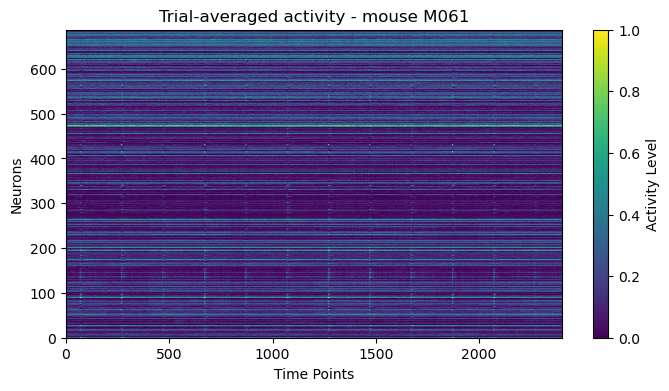

In [60]:
pltz.plot_neuron_activity(rnnz.rescale_array(trial_avg_activity.T), "Trial-averaged activity", mouse)

## RNN training

In [61]:
# RNN hyperparameters
nRunTrain = 5

reset points length: 329
last reset at: 131200
RNN input shape: (687, 2400)
trial=0 pVar=0.943730 chi2=2.574929
trial=1 pVar=0.954659 chi2=2.140440
trial=2 pVar=0.955101 chi2=2.127421
trial=3 pVar=0.956289 chi2=2.068545
trial=4 pVar=0.957645 chi2=1.998158
trial=5 pVar=0.951014 chi2=2.336672


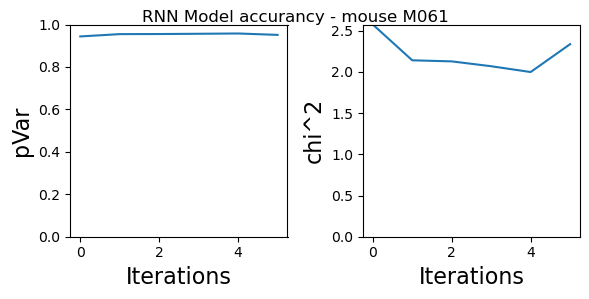

In [62]:
rnn_model, rnn_accuracy_fig = rnnz.run_rnn(trial_avg_activity, reset_points, regions_arr, df_, mouse, dtFactor = dtFactor, nRunTrain = nRunTrain)

### Plot RNN output

In [64]:
rnn_model_ = rnn_model.copy()
rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)

RNN model output transformed from shape: (687, 4799) to (687, 2400). Matching the original data shape of (687, 2400)


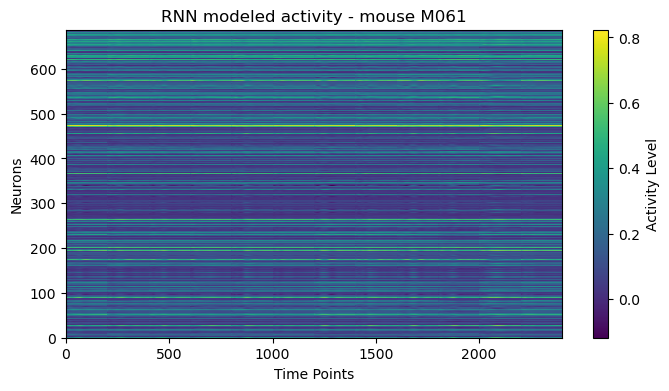

In [65]:
pltz.plot_neuron_activity(rnn_model_['RNN'].T, "RNN modeled activity", mouse)

## Analysis of model fit

### PCA of whole model

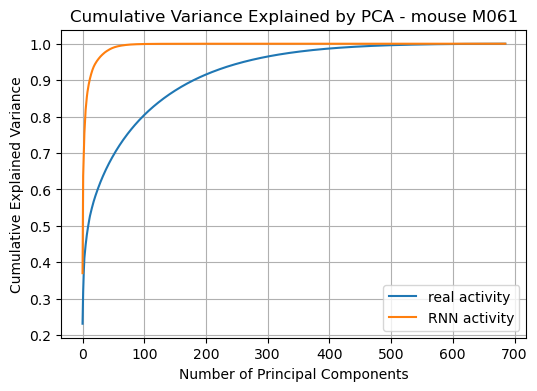

In [66]:
rnn_activity = rnn_model_['RNN'].T
real_activity = rnn_model_['Adata'].T
num_components = rnn_activity.shape[1] - 1

pca_real, pca_data_real = analyz.pca_fit_transform(real_activity, num_components)
pca_rnn, pca_data_rnn = analyz.pca_fit_transform(rnn_activity, num_components)

variance_figure = pltz.plot_pca_cum_var(pca_real, pca_rnn, mouse)

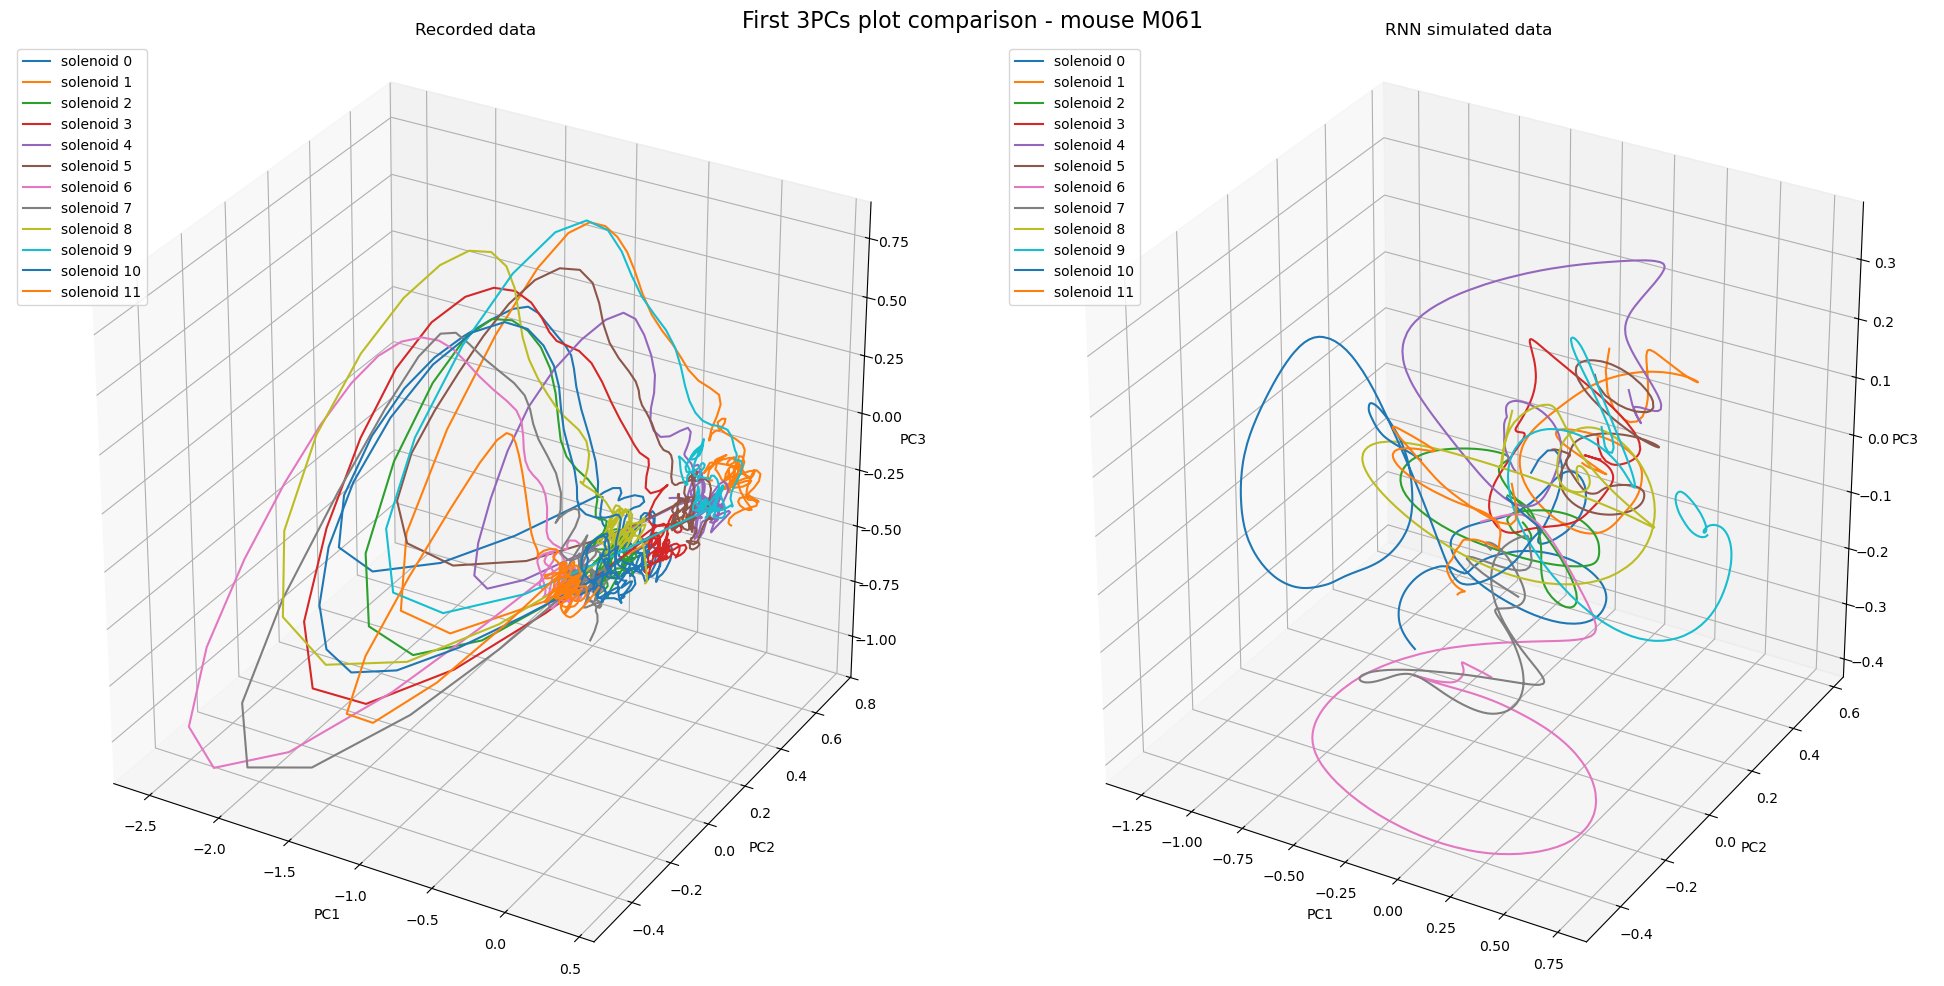

In [67]:
trial_labels = [f"solenoid {angle}" for angle in sol_angles]
PCA_figure = pltz.plot_pca(pca_data_real, pca_data_rnn, shapes, mouse, trial_labels) 

### CCA

In [68]:
model_cca = analyz.canoncorr(pca_data_real, pca_data_rnn)
ctrl1_cca = analyz.canoncorr(pca_data_real, pca_data_real)
ctrl2_cca = analyz.canoncorr(pca_data_rnn, pca_data_rnn)

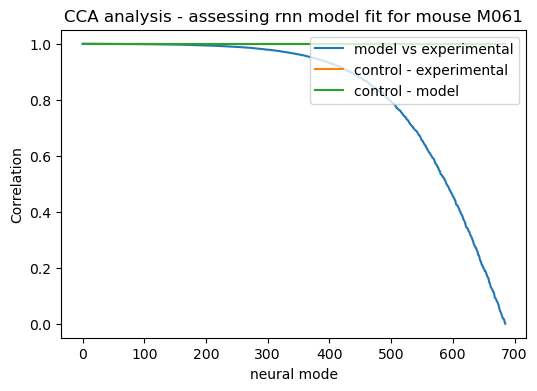

In [69]:
cca_figure = pltz.plot_cca(model_cca, ctrl1_cca, ctrl2_cca, mouse)

### PCA by region

In [70]:
PCA_data_real, pcas_real = analyz.pca_by_region(real_activity, regions_arr)
PCA_data_rnn, pcas_rnn = analyz.pca_by_region(rnn_activity, regions_arr)

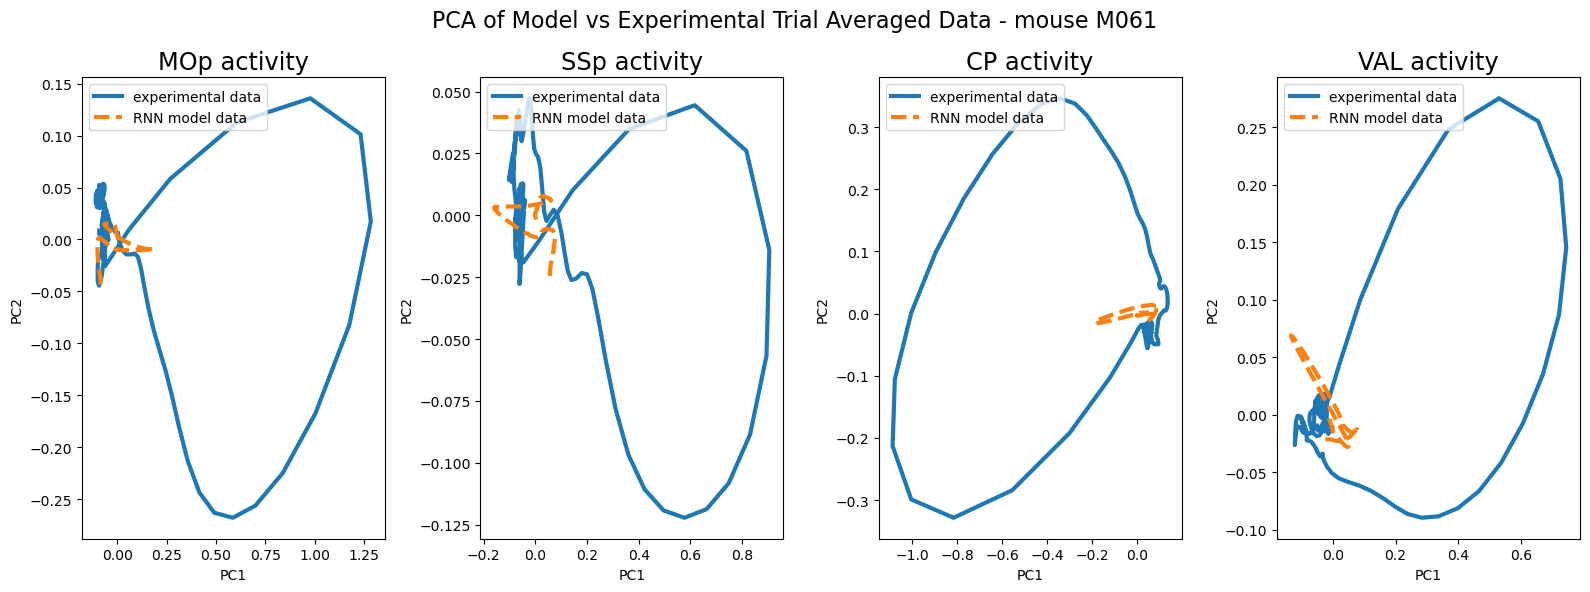

In [71]:
figure = pltz.plot_pca_by_region(PCA_data_real, PCA_data_rnn, shapes, regions_arr, mouse)

### Weight matrix

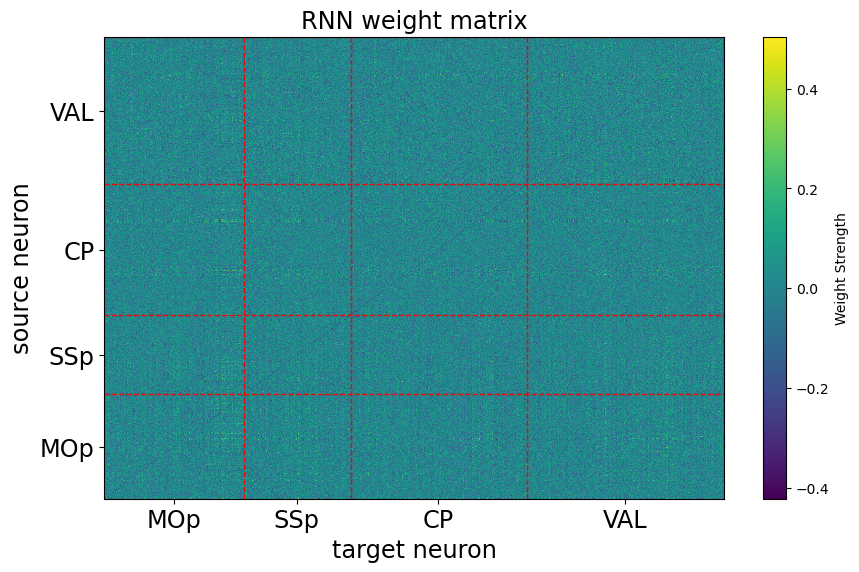

In [72]:
weight_matrix_fig = pltz.plot_rnn_weight_matrix(rnn_model, regions_arr)

### Firing rate analysis

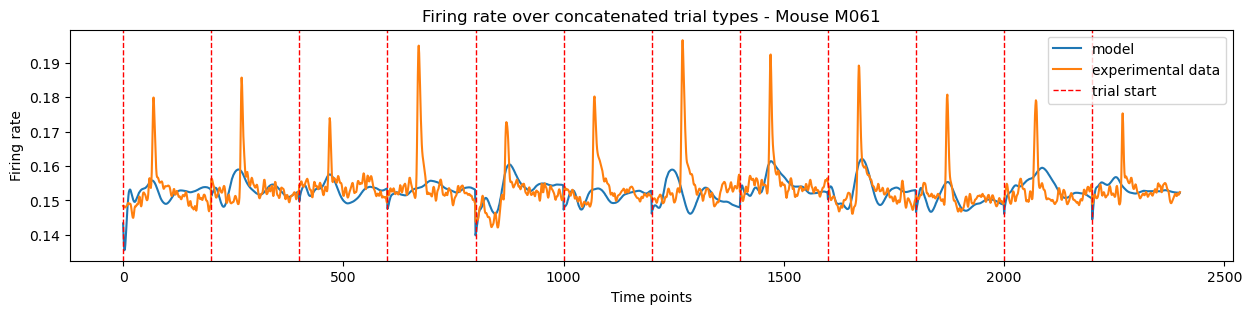

In [73]:
fr_fig = pltz.plot_firing_rates(rnn_model_, reset_points, mouse)

/home/zms24/Desktop/earthquake-analysis/tools/rnn_and_curbd/plotting.py:275: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


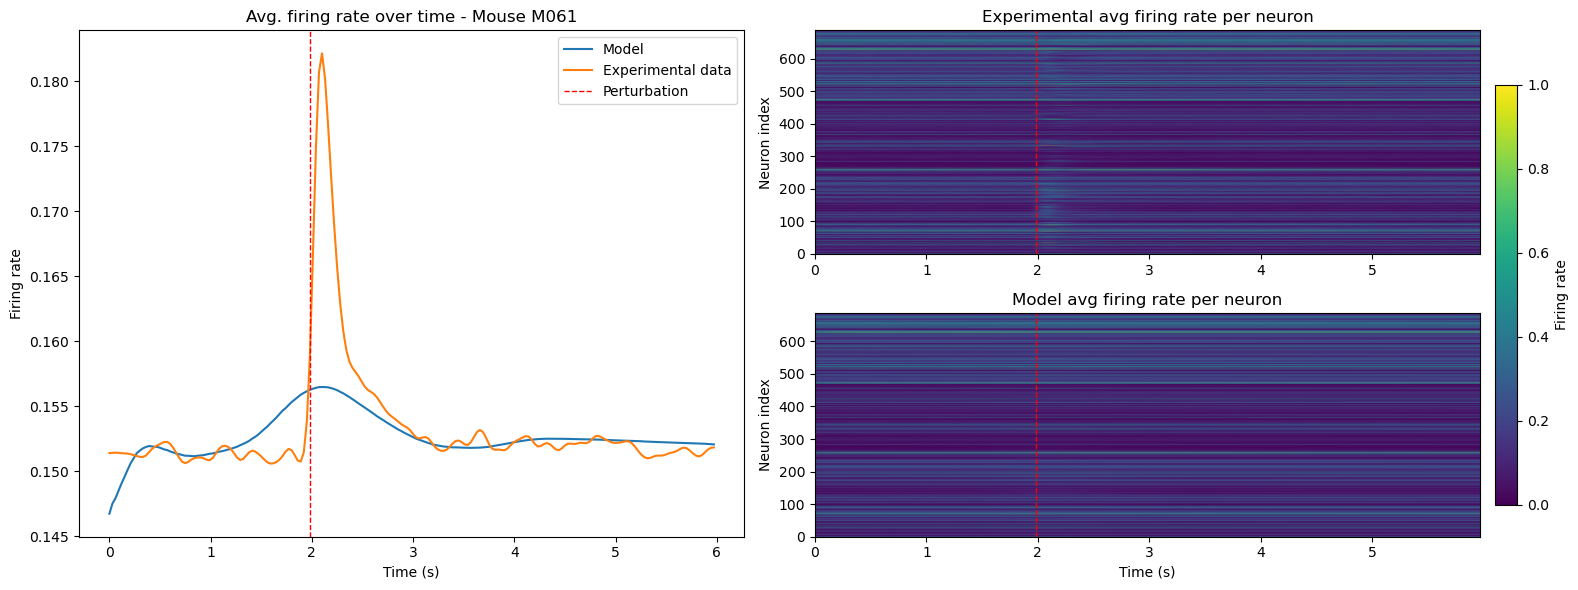

In [74]:
avg_fr_fig = pltz.plot_avg_firing_rates(rnn_model_, shapes, perturbation_time_sec, bin_size=BIN_SIZE, mouse_num=mouse)

## CURBD

In [75]:
curbd_arr, curbd_labels = curbd.computeCURBD(rnn_model)
n_regions = curbd_arr.shape[0]
currents, current_labels = curbdz.format_curbd_output(curbd_arr, curbd_labels, n_regions, reset_points)

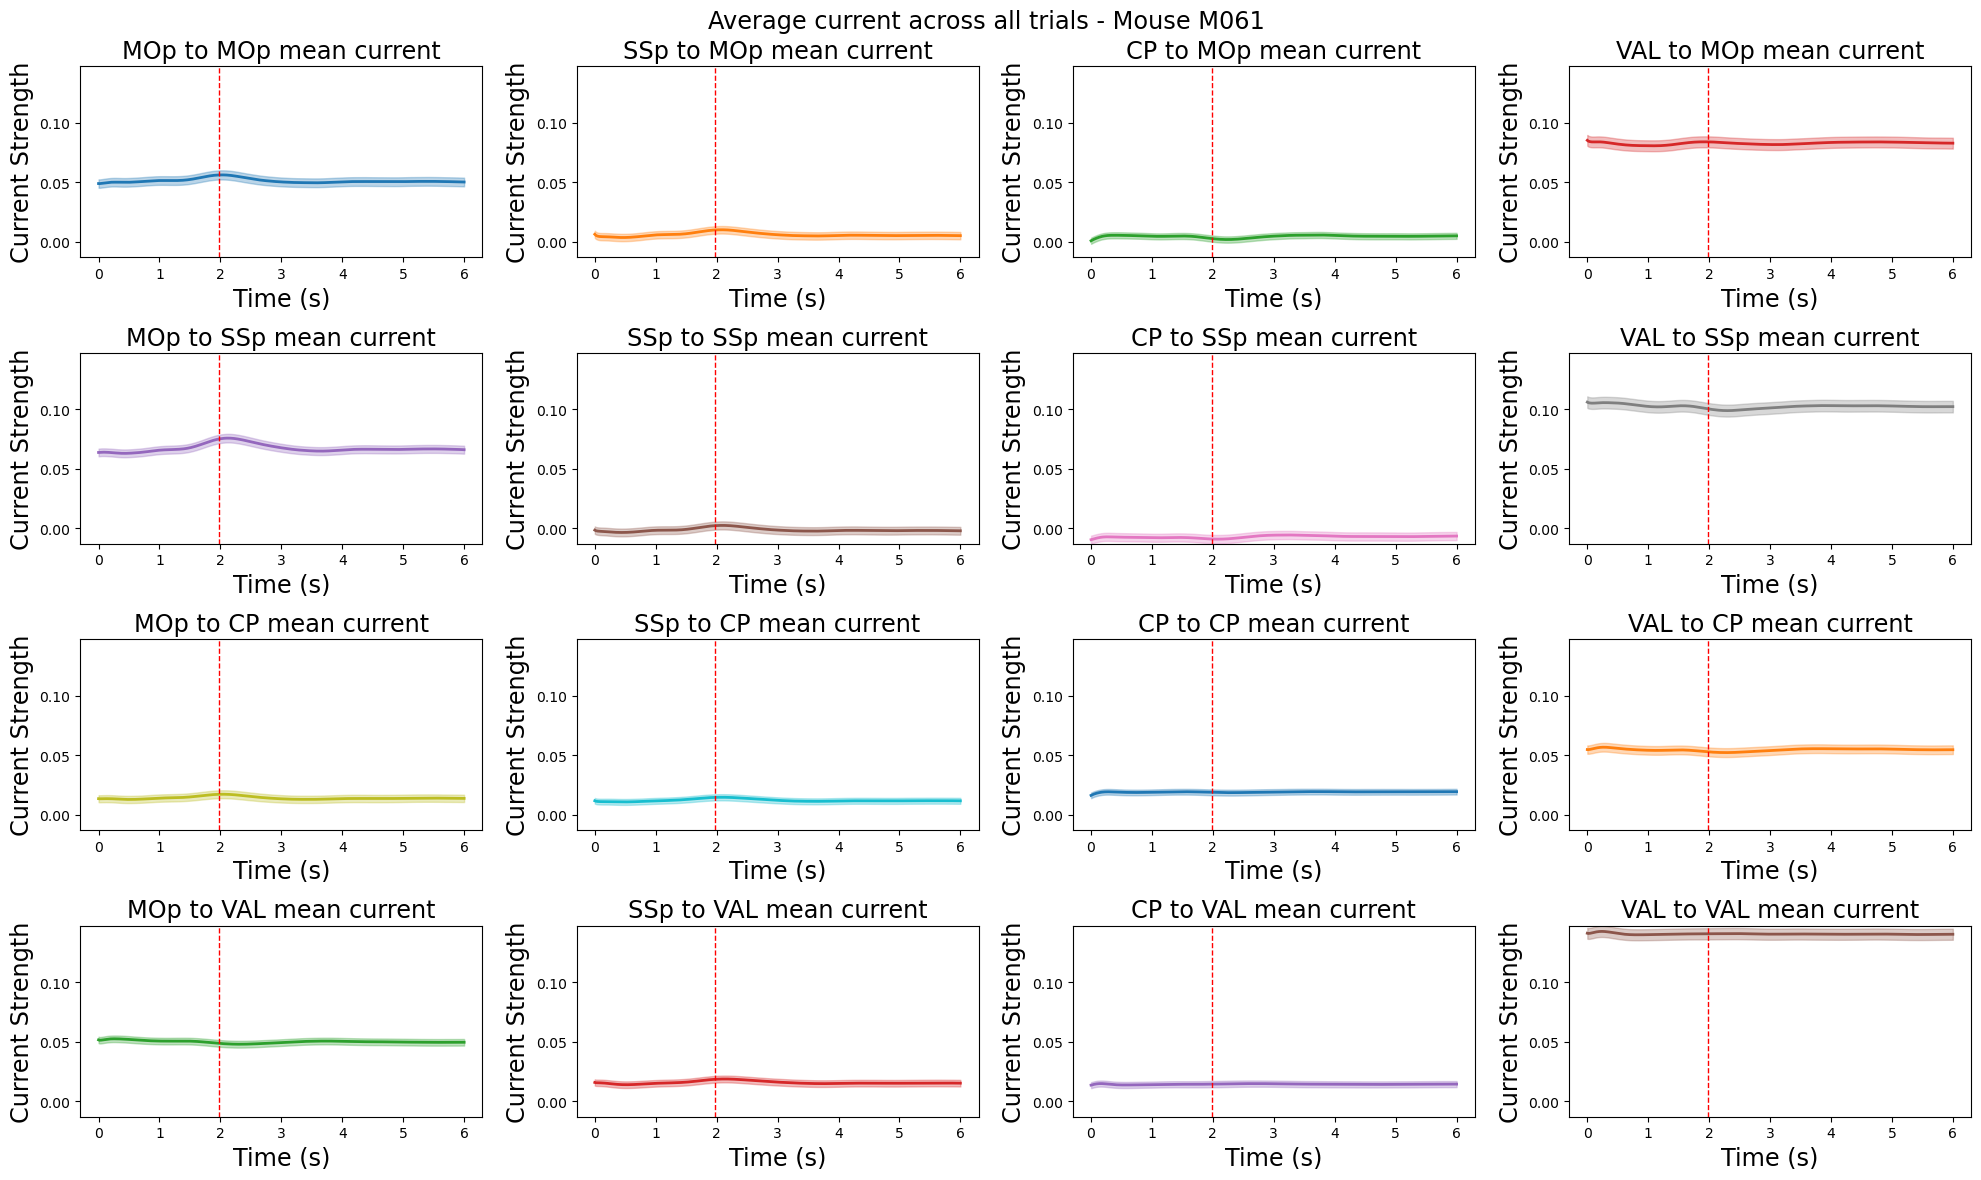

In [76]:
currents_fig = pltz.plot_currents_by_region(currents, current_labels, perturbation_time_sec, BIN_SIZE, dtFactor, mouse)

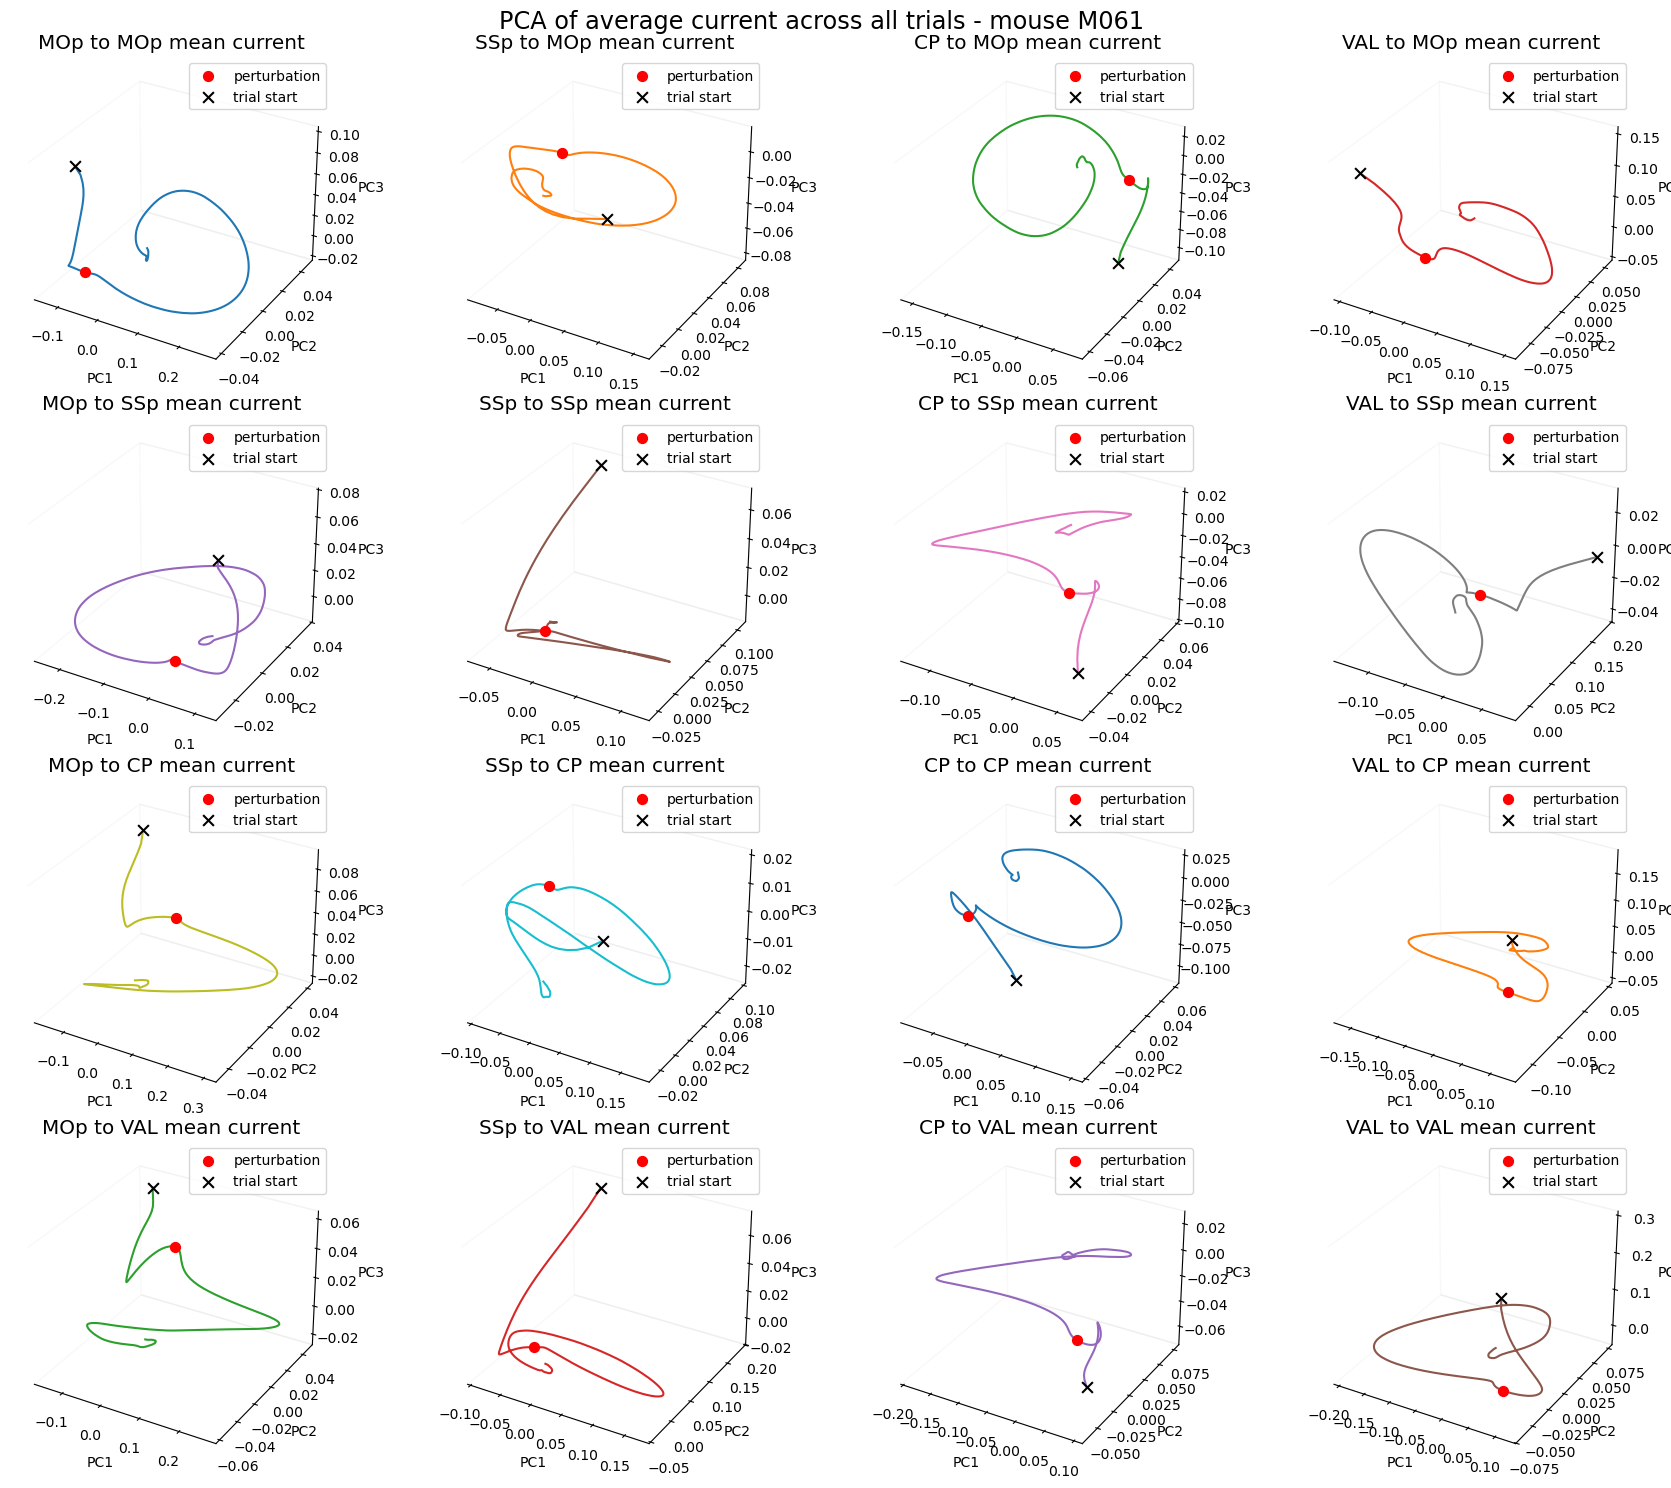

In [77]:
pca_current_fig = pltz.plot_pca_currents(currents, current_labels, perturbation_time, mouse, fig_size = (18, 15))

### Saving RNN model

In [ ]:
rnn_model_to_save = rnn_model.copy()
try:
    if isinstance(rnn_model_to_save['params'].get('nonLinearity'), np.ufunc):
        rnn_model_to_save['params']['nonLinearity'] = rnn_model_to_save['params']['nonLinearity'].__name__
    savemat(f"rnn_model_{mouse}.mat", {"rnn_model": rnn_model_to_save})
except Exception as e:
    print(f"Error saving RNN model for mouse {mouse}:", e)